# **BT thực hành 3.3: Sử dụng PCA sklearn để giảm chiều dữ liệu hình ảnh**
- Đọc tập tin **original.png** và hiển thị hình ảnh gốc
- Áp dụng PCA để giảm chiều dữ liệu còn 100 chiều (ban đầu có 1440 chiều)
- Hiển thị hình ảnh sau khi đã giảm chiều dữ liệu


> Cập nhật: **07/2023**



In [ ]:
## Môi trường lập trình
from google.colab import drive
drive.mount("/content/gdrive")
folder = '/content/gdrive/My Drive/Edu/Chia se hoc lieu/LDS3/Bai tap HV/Ch3_PCA'

Mounted at /content/gdrive


In [ ]:
## Thư viện
import matplotlib.pyplot   as plt
import numpy               as np
import warnings
warnings.filterwarnings('ignore')

from PIL                   import Image
from sklearn.decomposition import PCA

In [ ]:
## Đọc tập tin vào dataframe
img = Image.open(folder + '/Data/original.png')
# size: (x = 1440, y  =960), type: PIL.PngImagePlugin.PngImageFile

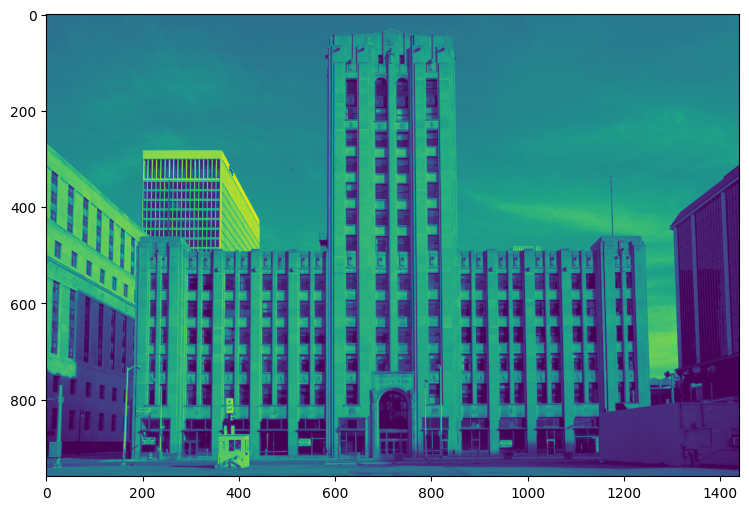

In [ ]:
## Hiển thị hình ảnh gốc
plt.figure(figsize = (9, 6))
plt.imshow(img)
plt.show()

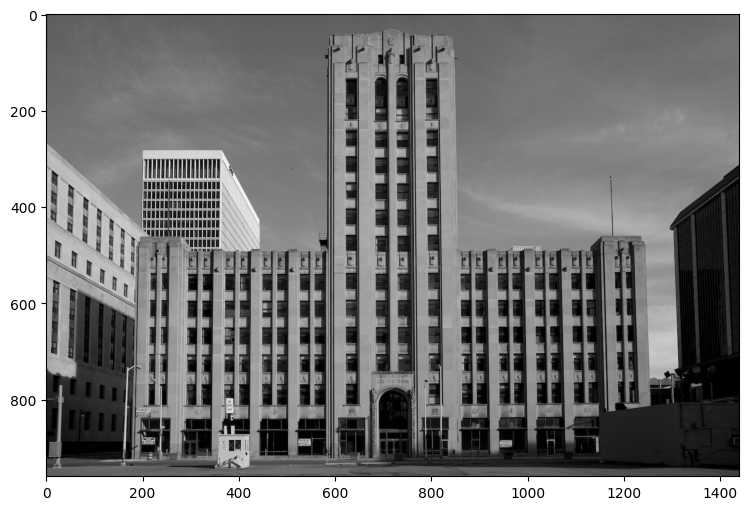

In [ ]:
## Chuyển sang grayscale
imggray = img.convert('LA')
plt.figure(figsize = (9, 6))
plt.imshow(imggray);

In [ ]:
## Chuyển từ hình ảnh sang dạng cấu trúc dữ liệu array 1 chiều (img_arr)
img_arr = np.array(list(imggray.getdata(band = 0)), float)

## Chuyển sang array 2 chiều để áp dụng PCA
img_arr.shape = (imggray.size[1], imggray.size[0]) # size: (960, 1440)

In [ ]:
## Áp dụng PCA giảm từ 1440 xuống còn 100 chiều
k   = 100
pca = PCA(n_components = k)
pca.fit(img_arr)

## Phép chiếu dữ liệu vào không gian mới
P = pca.transform(img_arr)

In [ ]:
## Kiểm tra sơ bộ kết quả
print('Số chiều dữ liệu gốc     :', img_arr.shape[1]) # ảnh gốc: 1440 cột
print('Số chiều dữ liệu biến đổi:', P.shape[1])       # ảnh biến đổi: 100 cột

Số chiều dữ liệu gốc     : 1440
Số chiều dữ liệu biến đổi: 100


In [ ]:
## Chuyển ma trận P trở về dạng hình ảnh
img_arr_new = pca.inverse_transform(P)

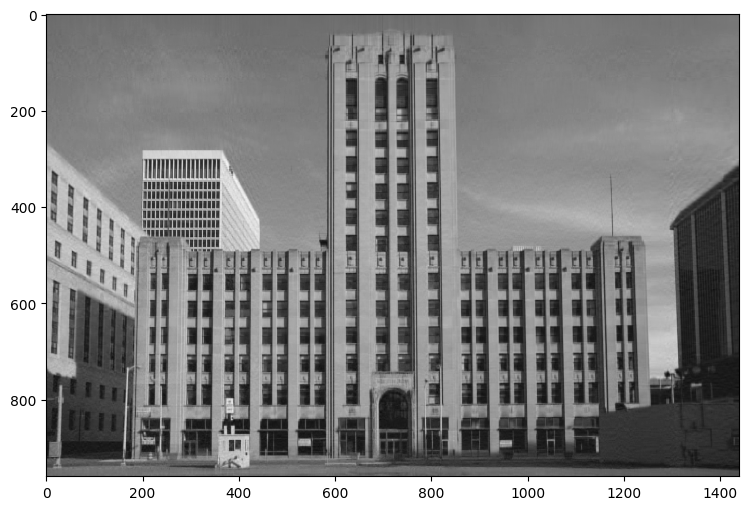

In [ ]:
## Hiển thị hình ảnh đã biến đổi (k = 100)
plt.figure(figsize = (9, 6))
plt.imshow(img_arr_new, cmap = plt.cm.gray);